In [1]:
import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from daochem.database.analysis.base import RESULTS_DIR

In [32]:
COLOR_PALLETTE = sns.color_palette("Spectral", 6)[::-1]

In [23]:
# Load survey data
topics = ['decisionmaking agency','decisionmaking trust','mission accomplished','wanted/needed','fulfillment']
columns=['q1','q2','q3','q4','q5']
questions = ['do you feel a sense of agency in the decision-making process?',
             'do you trust the decision-making process?',
             'does the DAO effectively accomplish its mission?',
             'do you feel wanted and/or needed by the DAO?',
             'does contributing to this DAO bring you a sense of fulfillment?']
LOCAL_CSV = os.path.join('tmp', 'sentiment.csv')
df = pd.read_csv(LOCAL_CSV, index_col=0)
df.rename(columns={'dao_name_clean': 'daoName'}, inplace=True)
len(df.index)

190

In [41]:
# Aggregate responses to questions
series = []
for i, c in enumerate(columns):
    series.append(pd.Series(df[c].value_counts(), name=f"{c.upper()} ({topics[i]})"))
df_agg = pd.DataFrame(series)*100/len(df.index)
df_agg.head()

,5,4,3,2,1
Q1 (decisionmaking agency),41.052632,27.894737,21.578947,5.789474,3.684211
Q2 (decisionmaking trust),38.947368,37.894737,14.736842,5.789474,2.631579
Q3 (mission accomplished),38.947368,35.789474,17.894737,6.315789,1.052632
Q4 (wanted/needed),38.421053,23.684211,23.157895,10.000000,4.736842
Q5 (fulfillment),45.263158,29.473684,21.578947,2.631579,1.052632


NameError: name 'RESULTS_DIR' is not defined

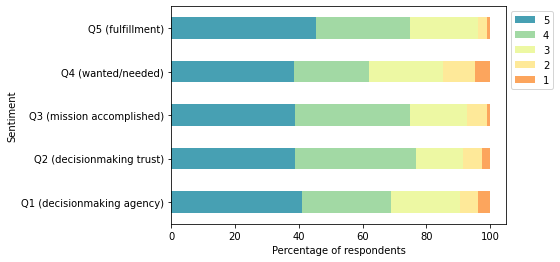

In [53]:
# Plot response distribution
ax = df_agg.plot.barh(stacked=True, color=COLOR_PALLETTE)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#add axis titles
plt.xlabel('Percentage of respondents')
plt.ylabel('Sentiment')

plt.savefig(os.path.join(RESULTS_DIR, "sentiment_distribution.svg"), dpi=300)

In [52]:
# Get summary statistics for each dao
gb = df.groupby('daoName').agg({'daoName': ['count'],
                                  **{c: ['mean', 'median'] for c in columns}})
gb[gb['daoName']['count'] > 5]

daoName    q1               q2               q3               q4  \
            count  mean median      mean median      mean median      mean   
daoName                                                                      
bankless       11  4.00    5.0  4.363636    4.0  4.454545    4.0  4.090909   
indexcoop       8  3.75    4.0  3.250000    3.5  3.500000    3.5  3.000000   
open            8  4.00    4.0  4.125000    4.5  4.125000    4.0  3.750000   

                        q5         
          median      mean median  
daoName                            
bankless     4.0  4.181818    4.0  
indexcoop    3.0  4.000000    4.0  
open         3.5  4.125000    4.5

In [ ]:
# Get summary statistics for each framework
gb_framework = df.groupby('framework').agg({'daoName': ['count'],
                                  **{c: ['mean', 'std'] for c in columns}})
gb_framework = gb_framework[gb_framework['daoName']['count'] > 1]

In [ ]:
for c in gb_framework.columns[1::2]:
    df = gb_framework[c]
    plt.figure(figsize=(16, 6))
    sns.barplot(x=gb_framework.index, y=c, data=gb_framework, ci=None)
    plt.xlabel('Framework', fontsize=18)
    plt.savefig(os.path.join(RESULTS_DIR, f"survey_vs_framework_{c}.svg"), dpi=300)

In [ ]:
gb_category = df.groupby('category').agg({'daoName': ['count'],
                                  **{c: ['mean'] for c in columns}})
gb_category = gb_category[gb_category['daoName']['count'] > 1]
gb_category

In [ ]:
for c in gb_category.columns[1::2]:
    df = gb_category[c]
    plt.figure(figsize=(16, 6))
    sns.barplot(x=gb_category.index, y=c, data=gb_category, ci=None)
    plt.xlabel('Category', fontsize=18)
    plt.savefig(os.path.join(RESULTS_DIR, "survey_vs_category.svg"), dpi=300)